<IPython.core.display.Javascript object>


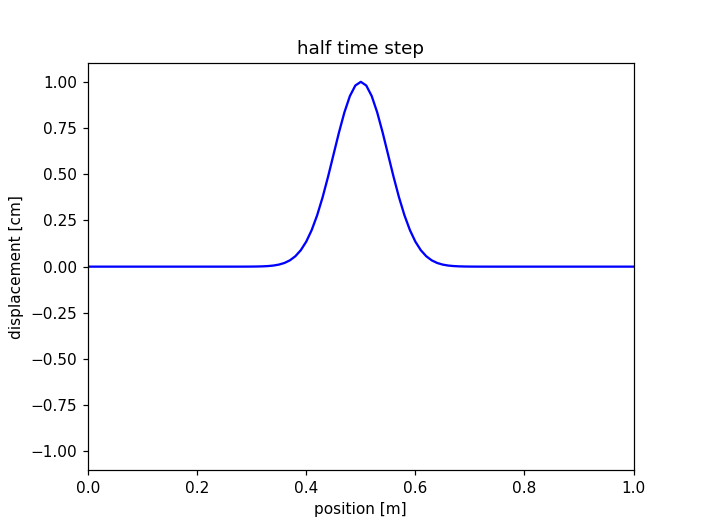

In [226]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# string parameters
L, T = 1, 0.04  # length of string; total time of animation
max_disp = 0.01  # maximum displacement of string
dx0, dt0 = 0.01, 0.0001  # default grid spacing and time step

# init = {'middle', 'end'} for plucking at middle or end
def soln(init, dx=dx0, dt=dt0):
    Nx, Nt = int(L/dx), int(T/dt)  # no. of grid and time divisions
    u = np.zeros((Nt+1, Nx+1), dtype=float)  # solution matrix
    X = np.linspace(0, L, Nx+1)  # grid points
    
    # initial (maximum) displacement
    # hence, initial velocity is zero
    if init=='middle':
        for i in range(1, Nx):
            u[0, i] = max_disp * np.exp(-200 * (X[i] - 0.5)**2)
    elif init=='end':
        for i in range(1, Nx):
            u[0, i] = max_disp * np.exp(-200 * (X[i] - 0.1)**2)
        
    # initial value problem
    for i in range(1, Nx):
        u[1, i] = (u[0, i+1] + u[0, i-1]) / 2  # initival velocity is zero
    
    # leapfrog algorithm (reduced for sample parameters)
    for j in range(1, Nt):  
        for i in range(1, Nx):
            u[j+1, i] = u[j, i+1] + u[j, i-1] - u[j-1, i]
            
    return u 

# setting for animation
# uncomment only one cell and RUN ALL
# else, I don't know why the animation does not work when I run a specific cell
fig, ax = plt.subplots()
ax.set_xlabel('position [m]')
ax.set_ylabel('displacement [cm]')
ax.set_xlim([0, 1])
ax.set_ylim([-110 * max_disp, 110 * max_disp])  # in cm
line, = ax.plot([], [], 'b-')

### default parameters
The pulse splits into two smaller pulses and reflects and bounces from the ends. 

In [227]:
u = soln('middle', dx0, dt0)
Nx = int(L / dx0)  # position divisions
Nt = int(T / dt0)
X = np.linspace(0, 1, Nx+1)  # positions

def graph(j):
    line.set_data(X, np.transpose(100 * u[j:j+1, 0:Nx+2]))  # in cm
    
anim = animation.FuncAnimation(fig, graph, frames=Nt+1, interval=50, repeat=0)
plt.title('default parameters')
plt.show()

### half grid spacing

In [228]:
dx_fac, dt_fac = 2, 1  # factors to reduce grid and time spacings
dx, dt = dx0 / dx_fac, dt0 / dt_fac

u = soln('middle', dx, dt)
Nx = int(L / dx)  # position divisions
Nt = int(T / dt)
X = np.linspace(0, 1, Nx+1)  # positions

def graph(j):
    line.set_data(X, np.transpose(100 * u[j:j+1, 0:Nx+2]))  # in cm
    
anim = animation.FuncAnimation(fig, graph, frames=Nt+1, interval=50, repeat=0)
plt.title('half grid spacing')
plt.show()

### half time step
- interval has to be halved to have similar time scales in all animations

In [229]:
dx_fac, dt_fac = 1, 2  # factors to reduce grid and time spacings
dx, dt = dx0 / dx_fac, dt0 / dt_fac

u = soln('middle', dx, dt)
Nx = int(L / dx)  # position divisions
Nt = int(T / dt)
X = np.linspace(0, 1, Nx+1)  # positions

def graph(j):
    line.set_data(X, np.transpose(100 * u[j:j+1, 0:Nx+2]))  # in cm
    
anim = animation.FuncAnimation(fig, graph, frames=Nt+1, interval=50 / dt_fac, repeat=0)
plt.title('half time step')
plt.show()

### plucked near the end
As predicted, the pulse reflects off the ends and bounces back and forth.

In [230]:
u = soln('end', dx0, dt0)
Nx = int(L / dx0)  # position divisions
Nt = int(T / dt0)
X = np.linspace(0, 1, Nx+1)  # positions

def graph(j):
    line.set_data(X, np.transpose(100 * u[j:j+1, 0:Nx+2]))  # in cm
    
anim = animation.FuncAnimation(fig, graph, frames=Nt+1, interval=50, repeat=0)
plt.title('plucked near the end')
plt.show()

### conclusion
- There seems to be a problem with changing grid and time spacings since reducing the grid spacing should lead to unstability whereas reducing time spacing should not affect the stability.
- Maybe it is something to do with how the FuncAnimation iterates over frames (which I am not fully aware of). I guess changing the solution array to one with positions in rows and time in columns may fix it.